In [403]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [404]:
df = pd.read_csv('/content/cukdeh.csv')
df

,Tahun,Kota/KAB,Median Upah,TPT,PPP,UMK
0,2018,KAB. PACITAN,1273950.000,1.104667,0.668933,1509816.120
1,2018,KAB. PONOROGO,1273950.000,3.804000,0.709267,1509816.120
2,2018,KAB. TRENGGALEK,1273950.000,3.220000,0.680533,1509816.120
3,2018,KAB. TULUNGAGUNG,1410066.667,3.247333,0.727400,1671035.770
4,2018,KAB. BLITAR,1395306.667,3.053333,0.698800,1653383.980
...,...,...,...,...,...,...
185,2022,KOTA PASURUAN,2730073.263,5.816667,0.831333,2730073.263
186,2022,KOTA MOJOKERTO,2400423.670,5.413333,0.931667,2400423.670
187,2022,KOTA MADIUN,1903605.863,6.810000,0.847667,1903605.863
188,2022,KOTA SURABAYA,4124003.663,8.410000,0.948333,4124003.663


In [405]:
def normalize(target):
    arr = []
    for i in range(len(target)):
        arr.append(target[i])

    normalized = []
    for i in range(len(arr)):
        normalized.append((arr[i] - np.min(arr)) / (np.max(arr) - np.min(arr)))
    return normalized

def normalize1(target):
    arr = []
    for i in range(len(target)):
        arr.append(target[i][0])

    normalized = []
    for i in range(len(arr)):
        normalized.append([(arr[i] - np.min(arr)) / (np.max(arr) - np.min(arr))])
    return normalized

In [406]:
x_train = []
y_train = []

x_test = []
y_test = []

x = []
y = []

In [407]:
for i in range(len(df["PPP"])):
    x.append([
        df["PPP"][i],
        df["TPT"][i],
        df["Median Upah"][i],
        ])
    y.append([df["UMK"][i]])

In [408]:
x = np.array(x)
transpose = x.T

In [409]:
len(y)

190

In [410]:
x_norm = []
y_norm = normalize1(y)
y_norm_1 = normalize1(y)
for i in range(len(transpose)):
    x_norm.append(normalize(transpose[i]))

In [411]:
kota_kab = []
for i in range(len(df["Kota/KAB"])):
    if(i < 152):
        str_kota_kab = "" + df["Kota/KAB"][i] + " " + str(df['Tahun'][i])
        kota_kab.append(str_kota_kab)

kota_kab_test = []
for i in range(len(df["Kota/KAB"])):
    if(i >= 152):
        str_kota_kab = "" + df["Kota/KAB"][i]
        kota_kab_test.append(str_kota_kab)

In [412]:
for i in range(len(x_norm)):
    x_norm_temp_2 = []
    x_norm_temp_3 = []
    for j in range(len(x_norm[0])):
        if(j < 152):
            x_norm_temp_2.append(x_norm[i][j])
        if(j >= 152):
            x_norm_temp_3.append(x_norm[i][j])
    x_train.append(x_norm_temp_2)
    x_test.append(x_norm_temp_3)
    
for i in range(len(y_norm)):   
    if(i < 152):
        y_train.append(y_norm[i])
    if(i >= 152):
        y_test.append(y_norm[i])

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

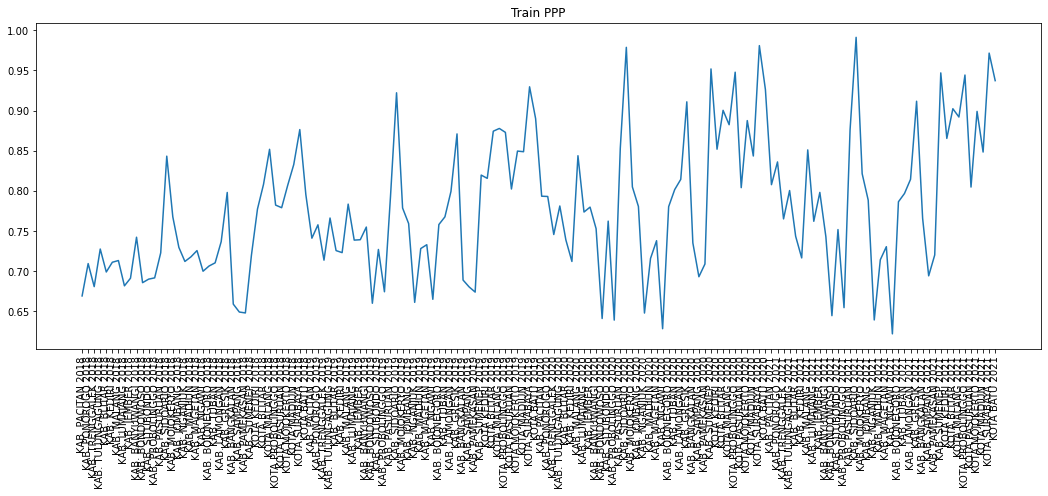

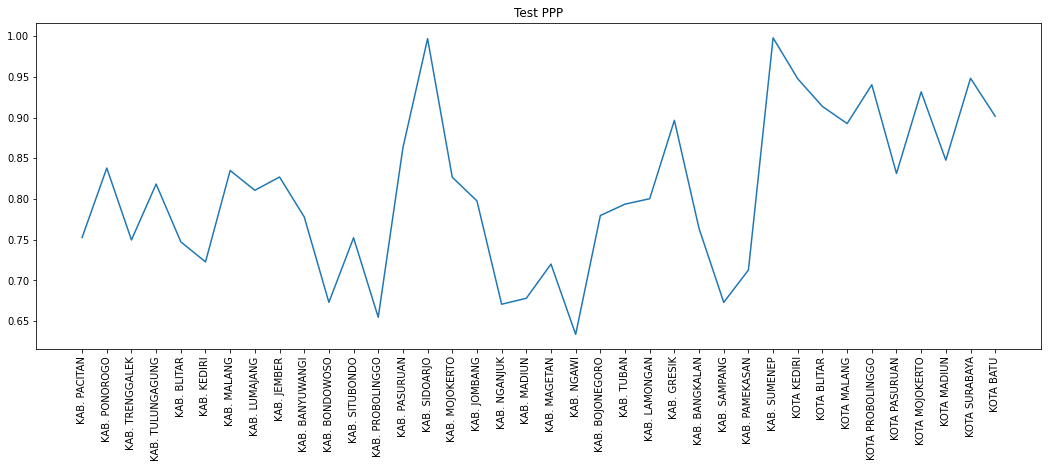

In [413]:
ppp_train_plot = []
ppp_test_plot = []
for i in range(len(df["PPP"])):
    if(i < 152):
        ppp_train_plot.append([df["PPP"][i]])
    if(i >= 152):
        ppp_test_plot.append([df["PPP"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, ppp_train_plot)
plt.title("Train PPP")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, ppp_test_plot)
plt.title("Test PPP")
plt.show()

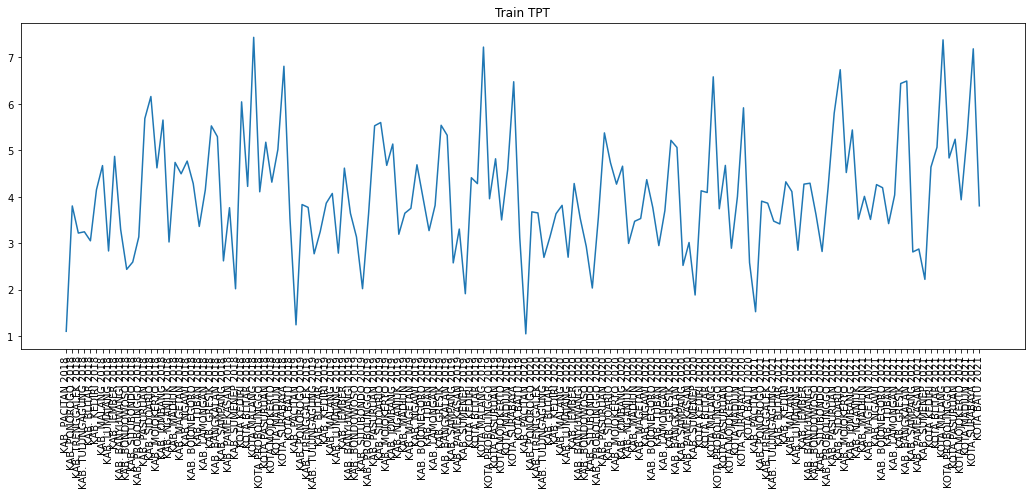

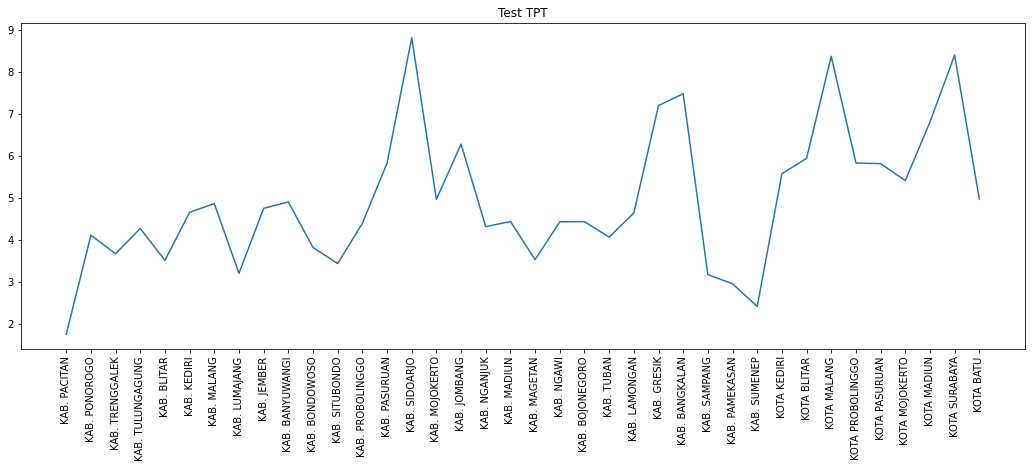

In [414]:
tpt_train_plot = []
ppp_test_plot = []
for i in range(len(df["TPT"])):
    if(i < 152):
        tpt_train_plot.append([df["TPT"][i]])
    if(i >= 152):
        ppp_test_plot.append([df["TPT"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, tpt_train_plot)
plt.title("Train TPT")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, ppp_test_plot)
plt.title("Test TPT")
plt.show()

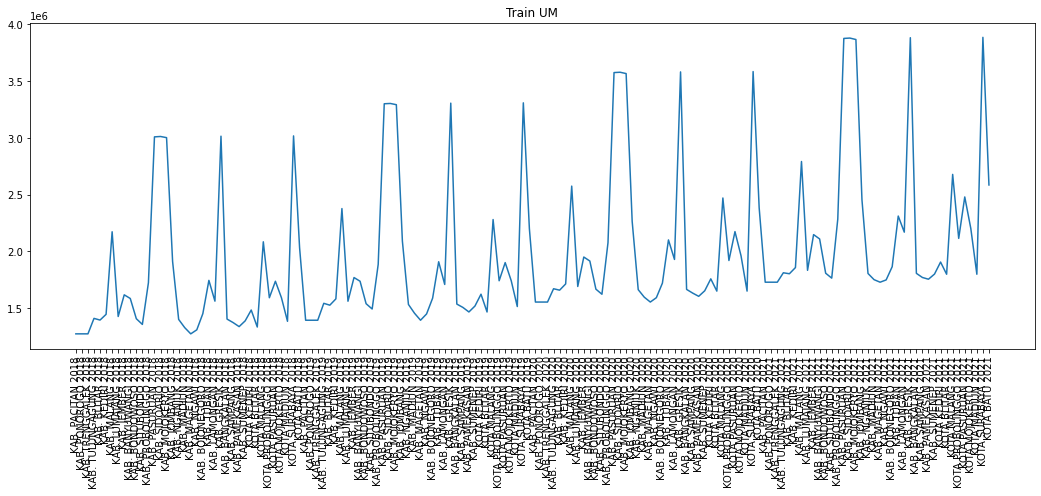

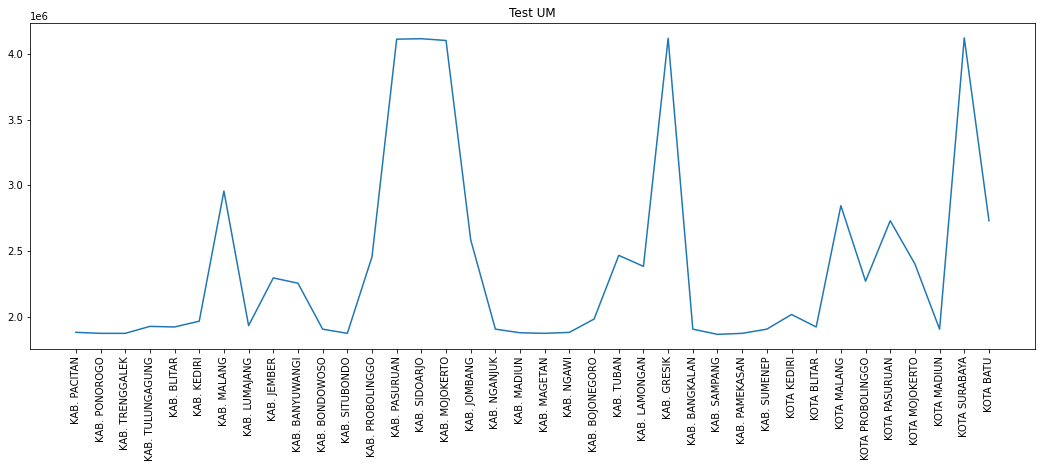

In [415]:
um_train_plot = []
um_test_plot = []
for i in range(len(df["Median Upah"])):
    if(i < 152):
        um_train_plot.append([df["Median Upah"][i]])
    if(i >= 152):
        um_test_plot.append([df["Median Upah"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, um_train_plot)
plt.title("Train UM")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, um_test_plot)
plt.title("Test UM")
plt.show()

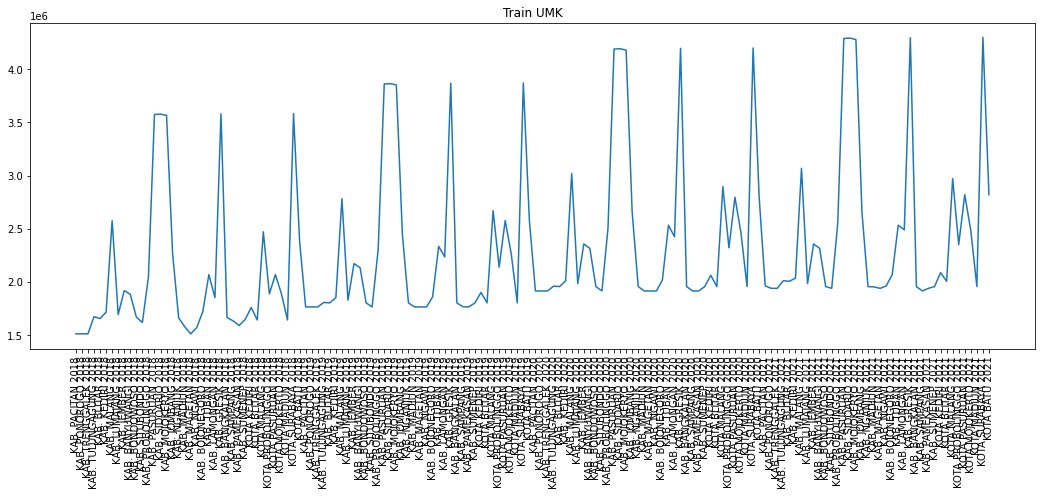

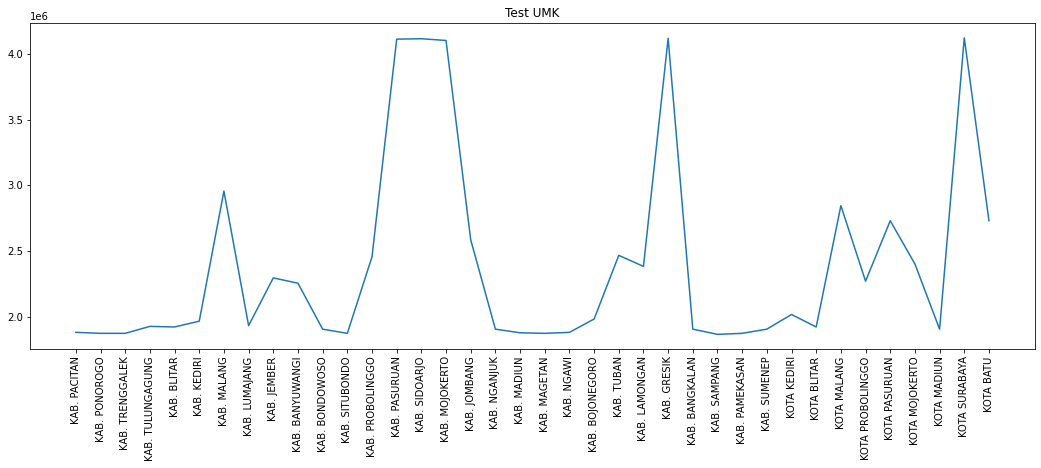

In [416]:
y_train_plot = []
y_test_plot = []
for i in range(len(df["UMK"])):
    if(i < 152):
        y_train_plot.append([df["UMK"][i]])
    if(i >= 152):
        y_test_plot.append([df["UMK"][i]])

plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab, y_train_plot)
plt.title("Train UMK")
plt.show()
print()
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.plot(kota_kab_test, y_test_plot)
plt.title("Test UMK")
plt.show()

In [417]:
np.random.seed(100)

class Layer_1:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 1 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_1:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 1 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_1.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_1.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(100)

class Layer_2:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 2 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_2:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 2 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_2.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_2.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

class Layer_3:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 3 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r

np.random.seed(100)

class NeuralNetwork_3:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 3 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_3.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_3.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
            
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(100)

class Layer_4:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 4 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_4:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 4 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_4.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_4.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(100)

class Layer_5:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 5 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_5:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 5 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_5.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_5.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned   

np.random.seed(100)

class Layer_6:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 6 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_6:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 6 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_6.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_6.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(100)

class Layer_7:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 7 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_7:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 7 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_7.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_7.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned

np.random.seed(100)

class Layer_8:
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(n_input, n_neurons)
        self.activation = activation
        self.bias = bias if bias is not None else np.random.randn(n_neurons)
        self.last_activation = None
        self.error_deriv = None
        self.derivs = None
        print("===================================================================================")
        print("Model 8 Initial weights: ", self.weights)

    def activate(self, x):
        r = np.dot(x, self.weights)
        self.last_activation = self._apply_activation(r)
        return self.last_activation

    def _apply_activation(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return np.tanh(r)
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        return r

    def apply_activation_derivative(self, r):
        if self.activation is None:
            return r
        if self.activation == 'tanh':
            return 1 - r ** 2
        if self.activation == 'sigmoid':
            return r * (1 - r)
        return r


class NeuralNetwork_8:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        self._layers.append(layer)

    def feed_forward(self, X):
        for layer in self._layers:
            X = layer.activate(X)
        return X

    def predict(self, X):
        ff = self.feed_forward(X)
        return ff
        """
        # One row
        if ff.ndim == 1:
            return np.argmax(ff)
        # Multiple rows
        return np.argmax(ff, axis=1)

        """
        
    def backpropagation(self, X, y, learning_rate):
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error_deriv = y - output
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(output) * output
            else:
                next_layer = self._layers[i + 1]
                layer.error_deriv = np.dot(next_layer.weights, next_layer.derivs)
                layer.derivs = layer.error_deriv * layer.apply_activation_derivative(layer.last_activation) * output
        for i in range(len(self._layers)):
            layer = self._layers[i]
            input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.derivs * input_to_use.T * learning_rate

    def train(self, X, y, learning_rate, max_epochs):
        mses = []
        mapes = []
        acc = []
        start_time = time.time()
        print("==================== Model 8 Training Start ====================")

        for i in range(max_epochs):
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            mse = np.mean(np.square(y - nn_8.feed_forward(X)))
            mses.append(mse)
            actual, pred = np.array(denormalize_data(y, df['UMK'])), np.array(denormalize_data(nn_8.feed_forward(X), df['UMK']))
            mapes.append(np.mean(np.abs((actual - pred) / actual)) * 100)
            acc.append(100 - (np.mean(np.abs((actual - pred) / actual)) * 100))
            if((i+1) % 25 == 0):
                print('Epoch: #%s, MSE: %f, MAPE: %f, Acc: %f' % ((i+1), float(mse), float(mapes[i]), float(acc[i])))
        times =  (time.time() - start_time)
        returned = [mses, mapes, acc, times]
        return returned     

In [418]:
def denormalize_data(normalized, target):
    arr = []
    norm = []
    for i in range(len(target)):
        arr.append(target[i])
    for i in range(len(normalized)):
        norm.append(normalized[i])

    denormalize = []
    for i in range(len(norm)):
        denormalize.append([norm[i][0] * (np.max(arr) - np.min(arr)) + np.min(arr)])
    return denormalize

In [419]:
nn_1 = NeuralNetwork_1()
nn_1.add_layer(Layer_1(3, 2, 'sigmoid'))
nn_1.add_layer(Layer_1(2, 1, 'sigmoid'))
errors_1 = nn_1.train(x_train.T, y_train, 0.025, 500)

nn_2 = NeuralNetwork_2()
nn_2.add_layer(Layer_2(3, 3, 'sigmoid'))
nn_2.add_layer(Layer_2(3, 1, 'sigmoid'))
errors_2 = nn_2.train(x_train.T, y_train, 0.025, 500)

nn_3 = NeuralNetwork_3()
nn_3.add_layer(Layer_3(3, 4, 'sigmoid'))
nn_3.add_layer(Layer_3(4, 1, 'sigmoid'))
errors_3 = nn_3.train(x_train.T, y_train, 0.025, 500)

nn_4 = NeuralNetwork_4()
nn_4.add_layer(Layer_4(3, 5, 'sigmoid'))
nn_4.add_layer(Layer_4(5, 1, 'sigmoid'))
errors_4 = nn_4.train(x_train.T, y_train, 0.025, 500)

nn_5 = NeuralNetwork_5()
nn_5.add_layer(Layer_5(3, 2, 'sigmoid'))
nn_5.add_layer(Layer_5(2, 1, 'sigmoid'))
errors_5 = nn_5.train(x_train.T, y_train, 0.05, 750)

nn_6 = NeuralNetwork_6()
nn_6.add_layer(Layer_6(3, 3, 'sigmoid'))
nn_6.add_layer(Layer_6(3, 1, 'sigmoid'))
errors_6 = nn_6.train(x_train.T, y_train, 0.05, 750)

nn_7 = NeuralNetwork_7()
nn_7.add_layer(Layer_7(3, 4, 'sigmoid'))
nn_7.add_layer(Layer_7(4, 1, 'sigmoid'))
errors_7 = nn_7.train(x_train.T, y_train, 0.05, 750)

nn_8 = NeuralNetwork_8()
nn_8.add_layer(Layer_8(3, 5, 'sigmoid'))
nn_8.add_layer(Layer_8(5, 1, 'sigmoid'))
errors_8 = nn_8.train(x_train.T, y_train, 0.05, 750)

Model 1 Initial weights:  [[-1.74976547  0.3426804 ]
 [ 1.1530358  -0.25243604]
 [ 0.98132079  0.51421884]]
Model 1 Initial weights:  [[-0.18949583]
 [ 0.25500144]]
==================== Model 1 Training Start ====================
Epoch: #25, MSE: 0.079869, MAPE: 29.864795, Acc: 70.135205
Epoch: #50, MSE: 0.076377, MAPE: 26.724817, Acc: 73.275183
Epoch: #75, MSE: 0.075654, MAPE: 25.461511, Acc: 74.538489
Epoch: #100, MSE: 0.075361, MAPE: 24.882003, Acc: 75.117997
Epoch: #125, MSE: 0.075138, MAPE: 24.558937, Acc: 75.441063
Epoch: #150, MSE: 0.074913, MAPE: 24.372275, Acc: 75.627725
Epoch: #175, MSE: 0.074675, MAPE: 24.254737, Acc: 75.745263
Epoch: #200, MSE: 0.074421, MAPE: 24.173437, Acc: 75.826563
Epoch: #225, MSE: 0.074153, MAPE: 24.112476, Acc: 75.887524
Epoch: #250, MSE: 0.073872, MAPE: 24.062771, Acc: 75.937229
Epoch: #275, MSE: 0.073580, MAPE: 24.019025, Acc: 75.980975
Epoch: #300, MSE: 0.073276, MAPE: 23.978104, Acc: 76.021896
Epoch: #325, MSE: 0.072960, MAPE: 23.938123, Acc: 76.

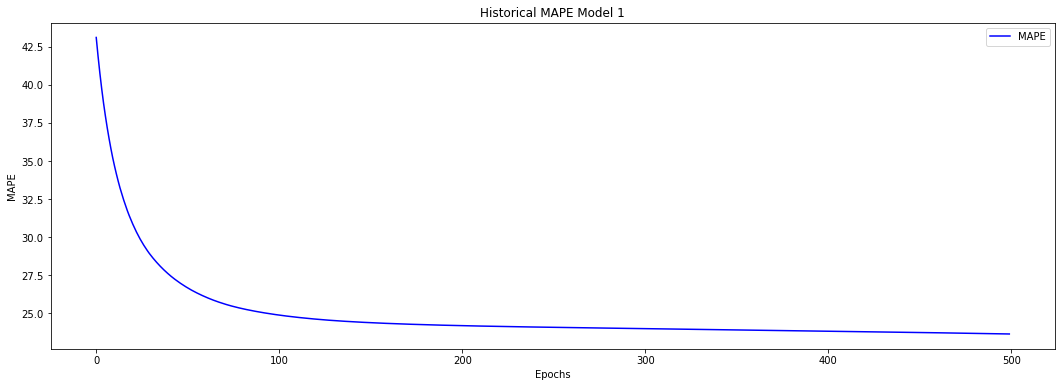

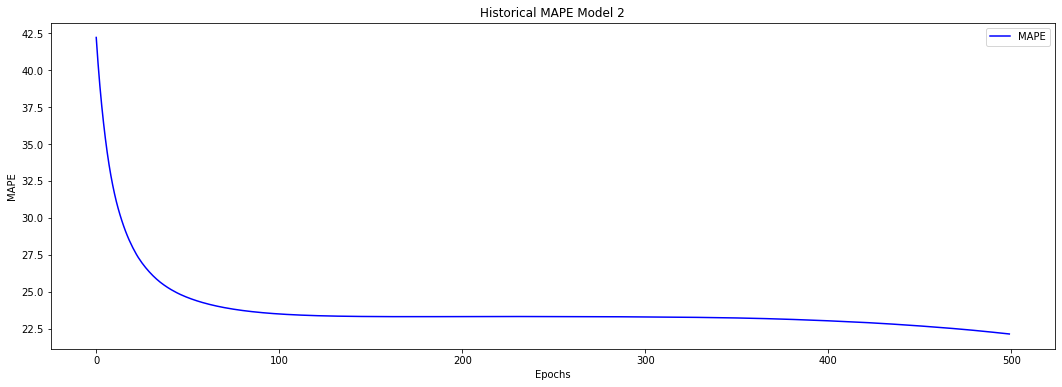

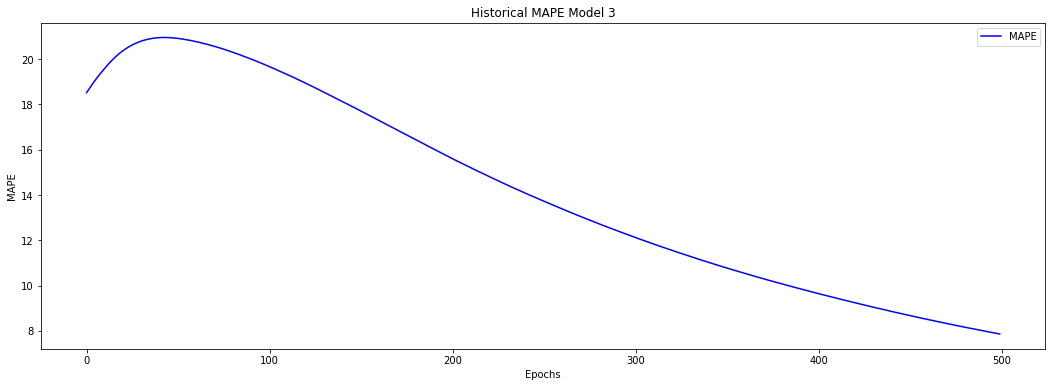

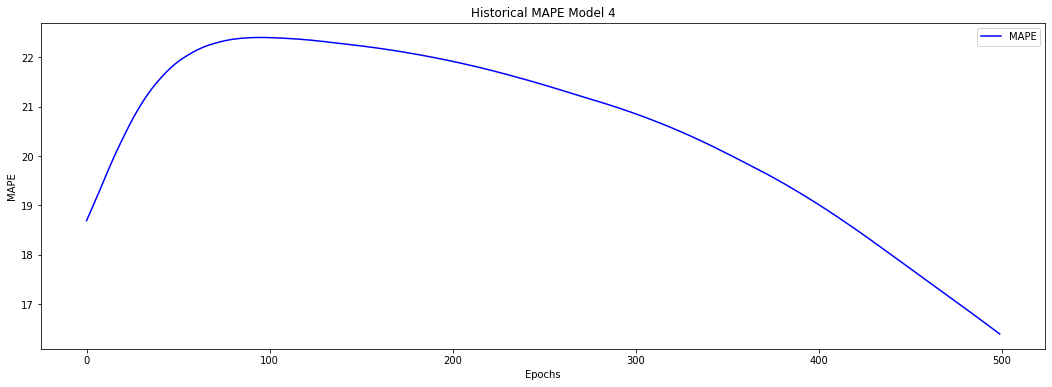

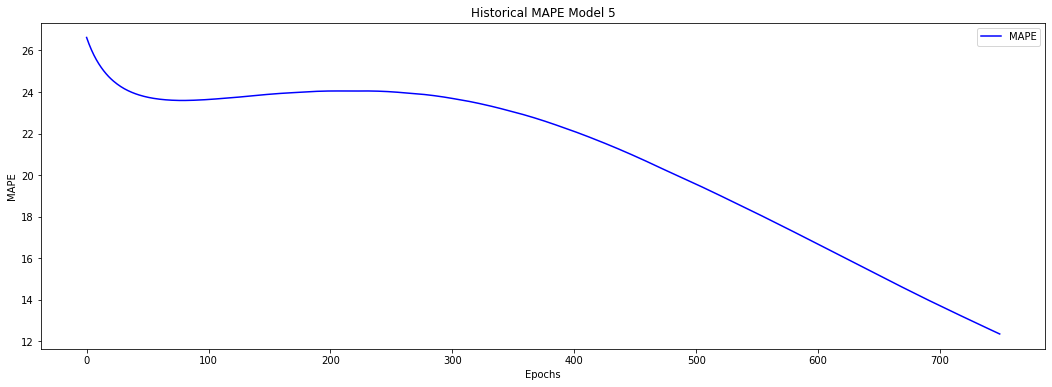

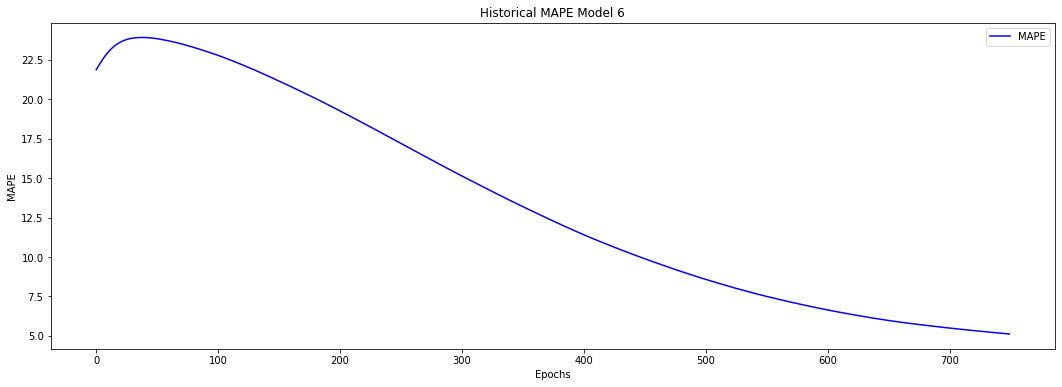

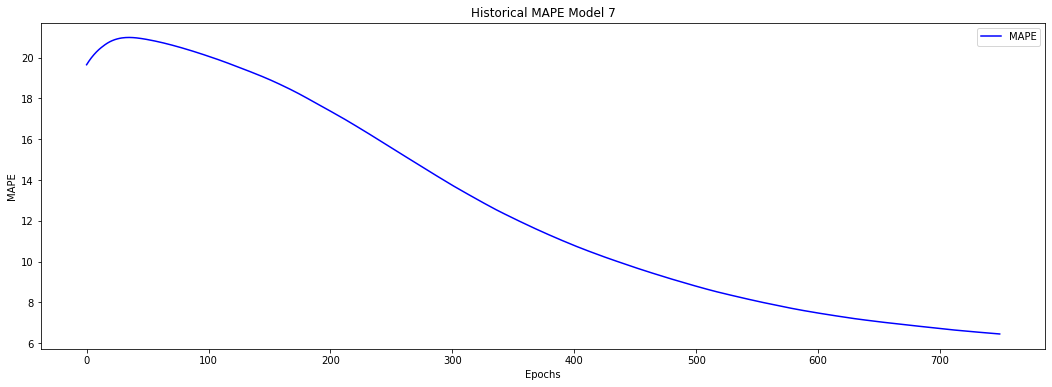

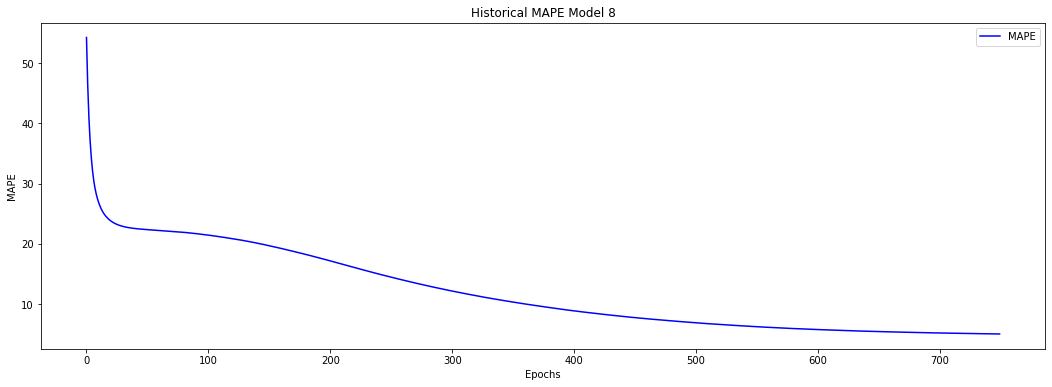

In [420]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 1')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 2')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 3')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 4')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_5[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 5')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_6[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 6')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_7[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 7')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_8[1], c = 'b', label = 'MAPE')
plt.title('Historical MAPE Model 8')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
plt.show()

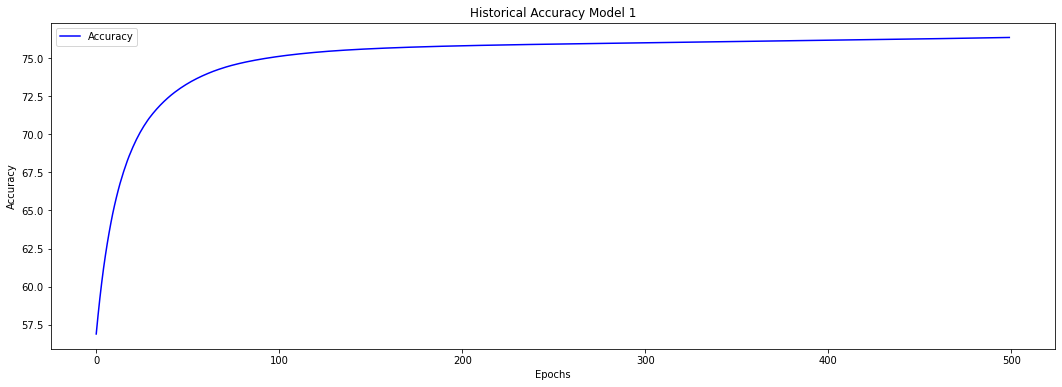

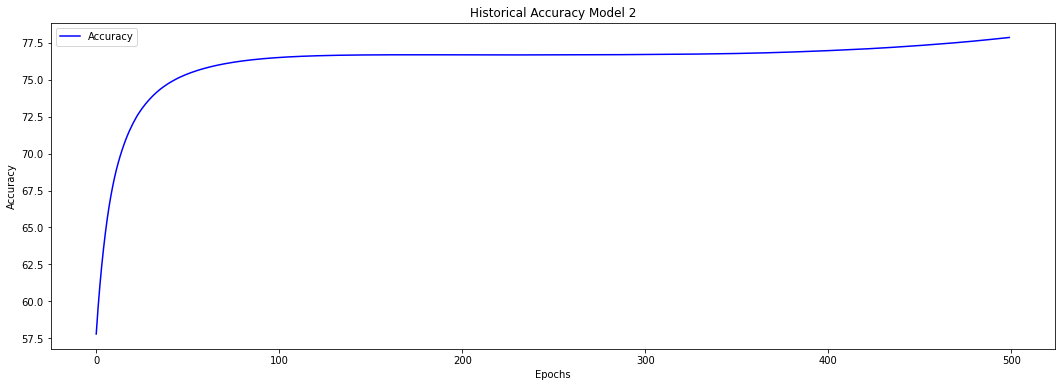

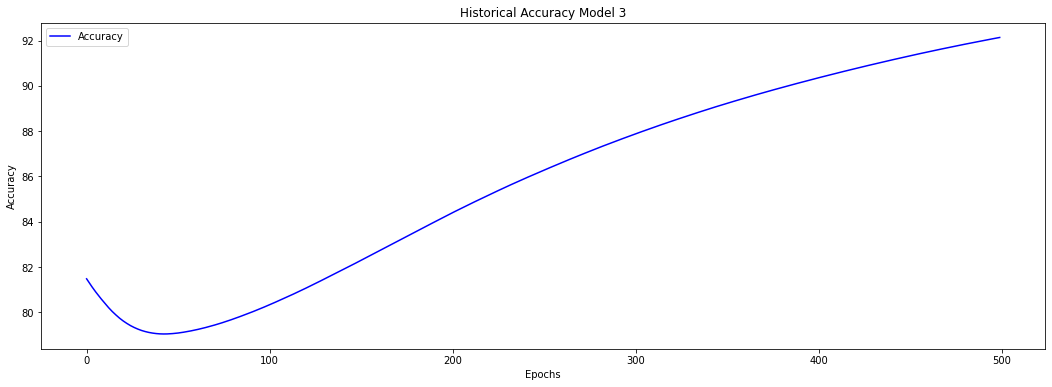

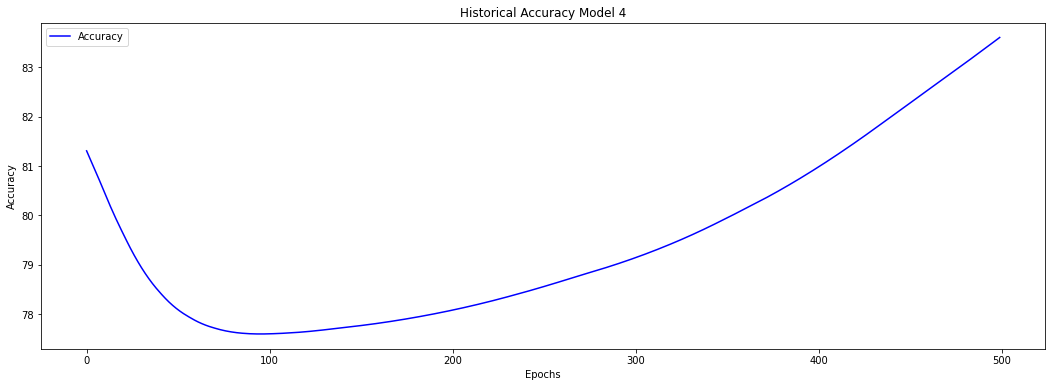

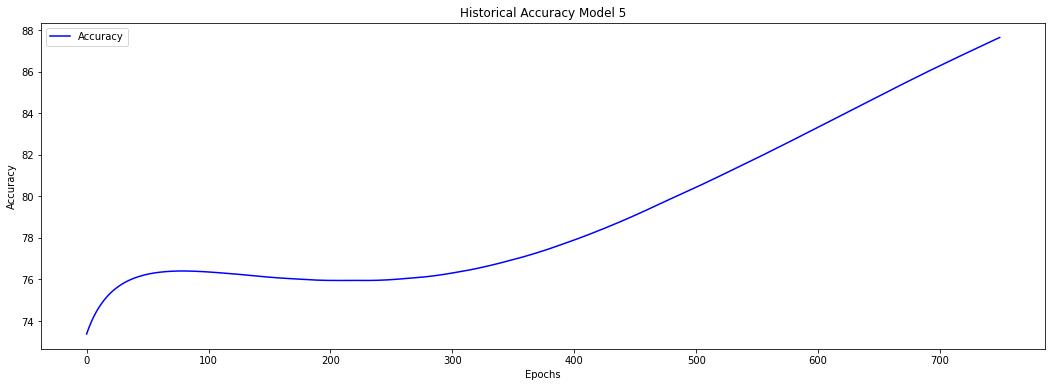

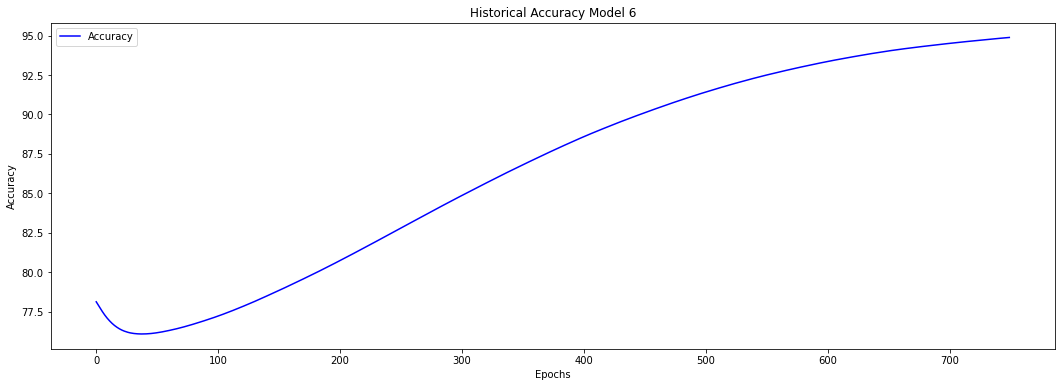

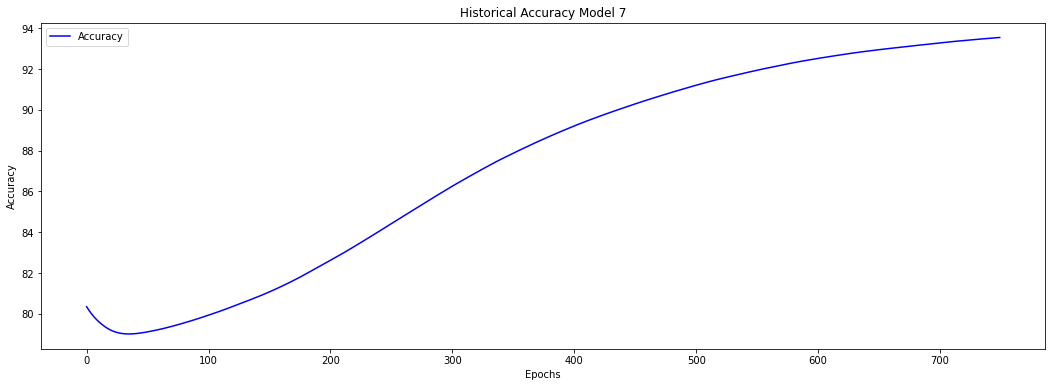

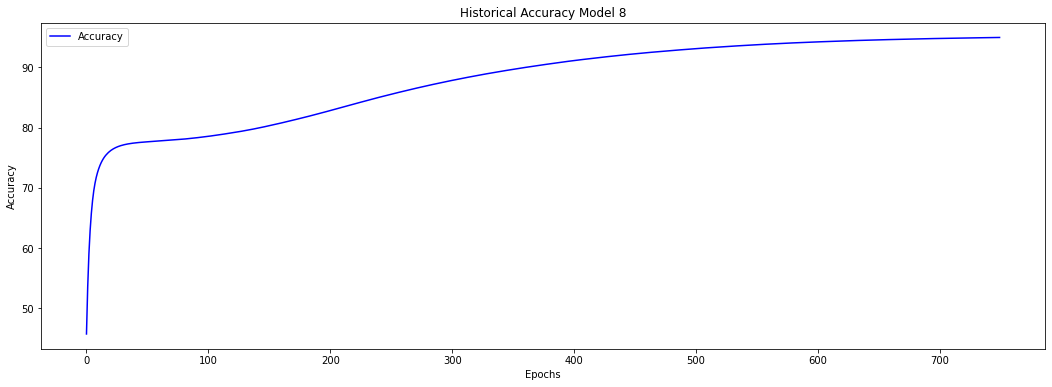

In [421]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_5[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_6[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 6')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_7[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 7')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_8[2], c = 'b', label = 'Accuracy')
plt.title('Historical Accuracy Model 8')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

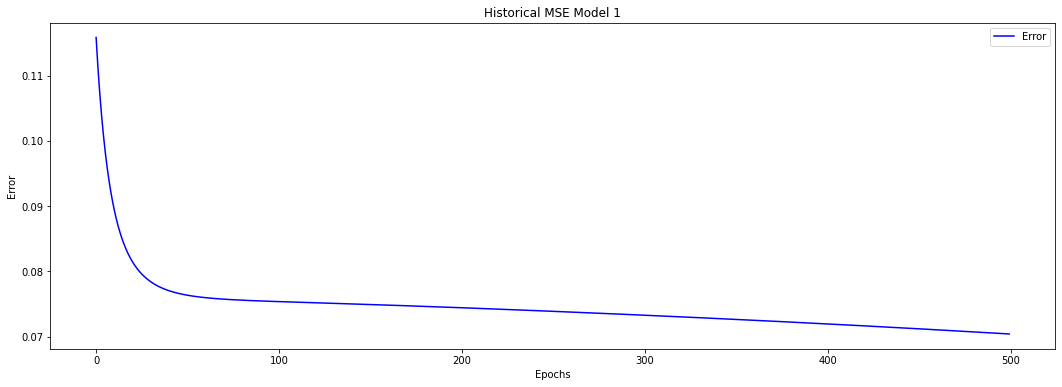

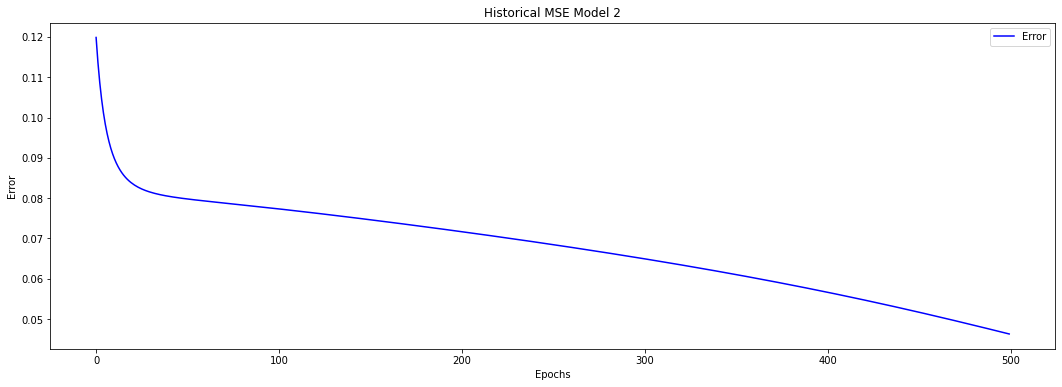

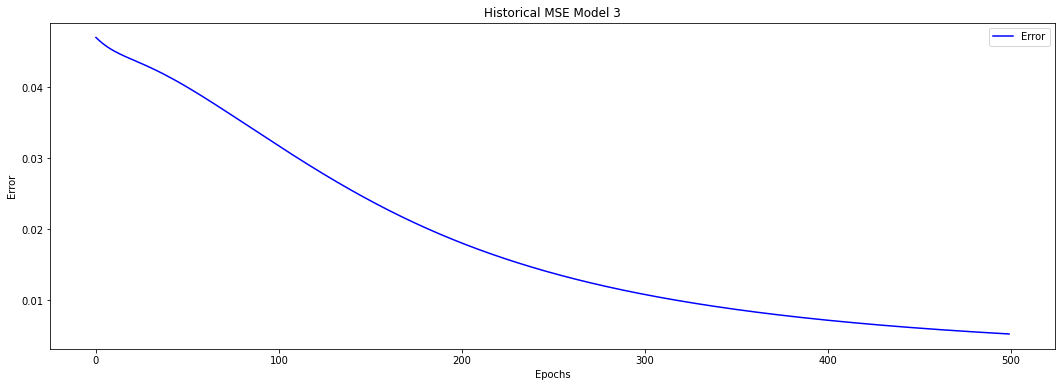

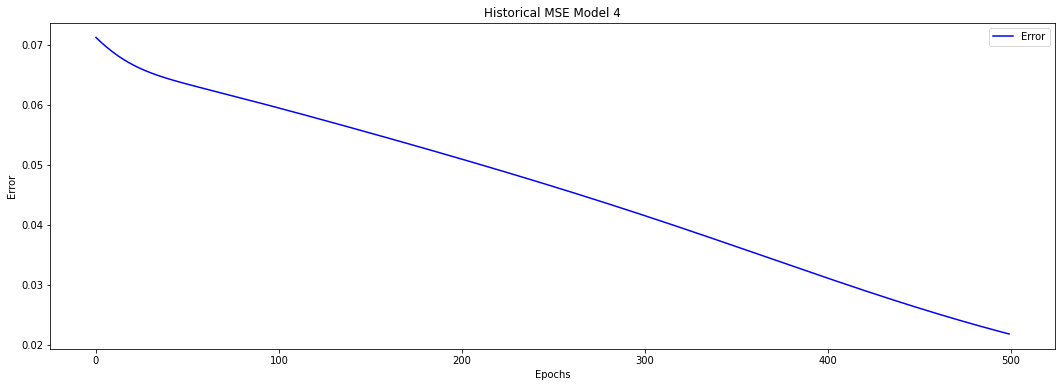

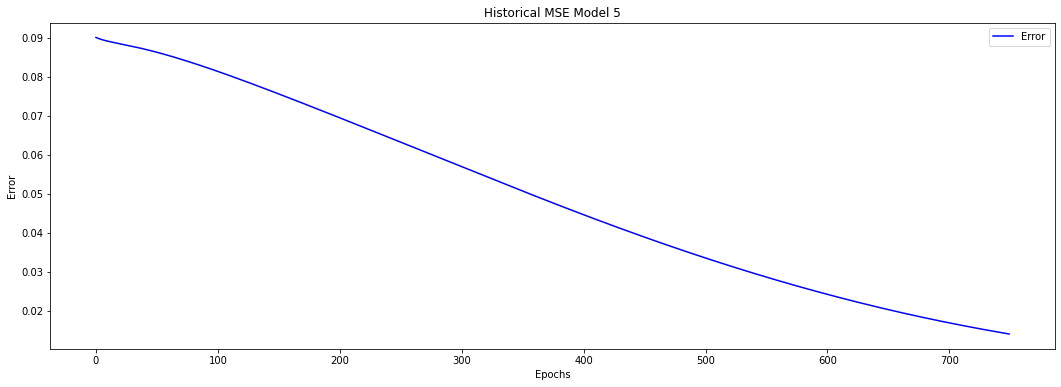

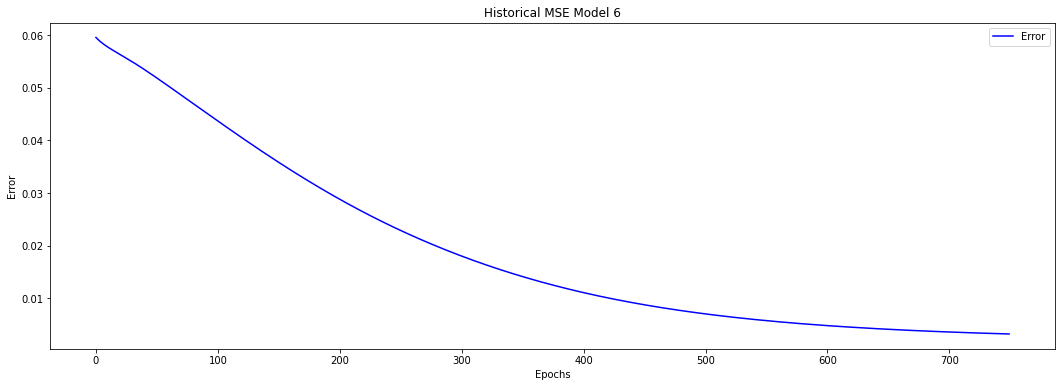

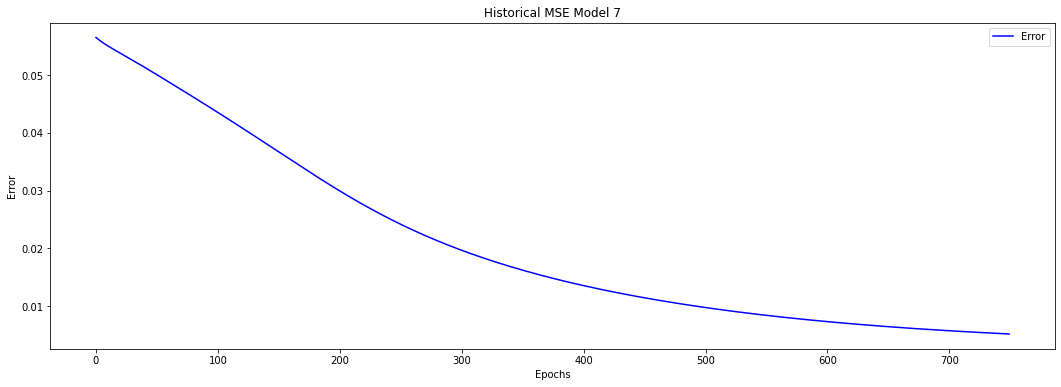

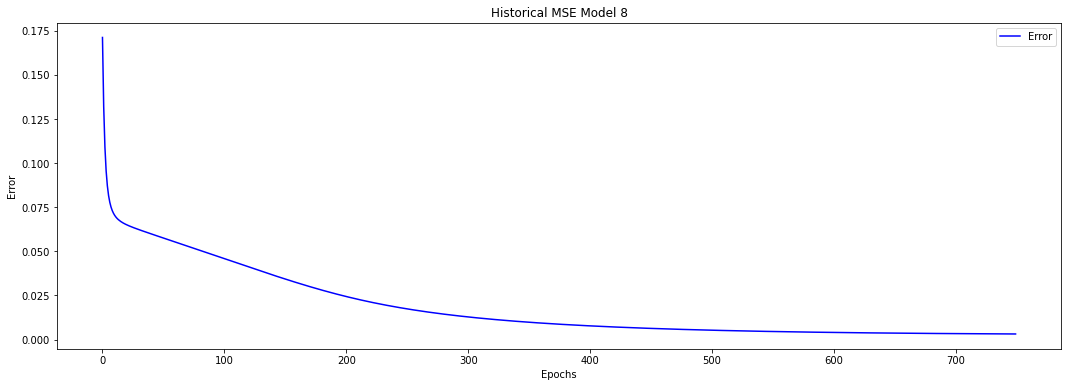

In [422]:
plt.figure(figsize=(18,6))
plt.plot(errors_1[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 1')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_2[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 2')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_3[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 3')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_4[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 4')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_5[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 5')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_6[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 6')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_7[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 7')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()
print()
plt.figure(figsize=(18,6))
plt.plot(errors_8[0], c = 'b', label = 'Error')
plt.title('Historical MSE Model 8')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [423]:
def denormalize(normalized, target):
    arr = []
    norm = []
    for i in range(len(target)):
        arr.append(target[i])
    for i in range(len(normalized)):
        norm.append(normalized[i])

    denormalize = []
    for i in range(len(norm)):
        denormalize.append([norm[i][0] * (np.max(arr) - np.min(arr)) + np.min(arr)])
    return denormalize

In [424]:
arr_1 = y_norm_1
arr_2 = y_norm_1
arr_3 = y_norm_1
arr_4 = y_norm_1
arr_5 = y_norm_1
arr_6 = y_norm_1
arr_7 = y_norm_1
arr_8 = y_norm_1
predict_1_1 = nn_1.predict(x_test.T)
for i in range(len(predict_1_1)):
    arr_1.append(predict_1_1[i].tolist())

predict_1_2 = nn_2.predict(x_test.T)
for i in range(len(predict_1_2)):
    arr_2.append(predict_1_2[i].tolist())

predict_1_3 = nn_3.predict(x_test.T)
for i in range(len(predict_1_3)):
    arr_3.append(predict_1_3[i].tolist())

predict_1_4 = nn_4.predict(x_test.T)
for i in range(len(predict_1_4)):
    arr_4.append(predict_1_4[i].tolist())
  
predict_1_5 = nn_5.predict(x_test.T)
for i in range(len(predict_1_5)):
    arr_5.append(predict_1_5[i].tolist())
  
predict_1_6 = nn_6.predict(x_test.T)
for i in range(len(predict_1_6)):
    arr_6.append(predict_1_6[i].tolist())
  
predict_1_7 = nn_7.predict(x_test.T)
for i in range(len(predict_1_7)):
    arr_7.append(predict_1_7[i].tolist())
  
predict_1_8 = nn_8.predict(x_test.T)
for i in range(len(predict_1_8)):
    arr_8.append(predict_1_8[i].tolist())

In [425]:
denormalize_1 = denormalize(arr_1, y)
denormalize_2 = denormalize(arr_2, y)
denormalize_3 = denormalize(arr_3, y)
denormalize_4 = denormalize(arr_4, y)
denormalize_5 = denormalize(arr_4, y)
denormalize_6 = denormalize(arr_4, y)
denormalize_7 = denormalize(arr_4, y)
denormalize_8 = denormalize(arr_4, y)

In [426]:
predicted_1_1 = []
actual_1_1 = []
predicted_2_1 = []
actual_2_1 = []

predicted_1_2 = []
actual_1_2 = []
predicted_2_2 = []
actual_2_2 = []

predicted_1_3 = []
actual_1_3 = []
predicted_2_3 = []
actual_2_3 = []

predicted_1_4 = []
actual_1_4 = []
predicted_2_4 = []
actual_2_4 = []

predicted_1_5 = []
actual_1_5 = []
predicted_2_5 = []
actual_2_5 = []

predicted_1_6 = []
actual_1_6 = []
predicted_2_6 = []
actual_2_6 = []

predicted_1_7 = []
actual_1_7 = []
predicted_2_7 = []
actual_2_7 = []

predicted_1_8 = []
actual_1_8 = []
predicted_2_8 = []
actual_2_8 = []

In [427]:
for i in range(len(denormalize_1)):
    if(i >= 152 and i <= 189):
        actual_1_1.append(denormalize_1[i])
        actual_2_1.append(arr_1[i])
    if(i >= 190 and i <= 227):
        predicted_1_1.append(denormalize_1[i])
        predicted_2_1.append(arr_1[i])

for i in range(len(denormalize_2)):
    if(i >= 152 and i <= 189):
        actual_1_2.append(denormalize_2[i])
        actual_2_2.append(arr_2[i])
    if(i >= 228 and i <= 265):
        predicted_1_2.append(denormalize_2[i])
        predicted_2_2.append(arr_2[i])

for i in range(len(denormalize_3)):
    if(i >= 152 and i <= 189):
        actual_1_3.append(denormalize_3[i])
        actual_2_3.append(arr_3[i])
    if(i >= 266 and i <= 303):
        predicted_1_3.append(denormalize_3[i])
        predicted_2_3.append(arr_3[i])

for i in range(len(denormalize_4)):
    if(i >= 152 and i <= 189):
        actual_1_4.append(denormalize_4[i])
        actual_2_4.append(arr_4[i])
    if(i >= 304 and i <= 341):
        predicted_1_4.append(denormalize_4[i])
        predicted_2_4.append(arr_4[i])

for i in range(len(denormalize_5)):
    if(i >= 152 and i <= 189):
        actual_1_5.append(denormalize_5[i])
        actual_2_5.append(arr_5[i])
    if(i >= 342 and i <= 379):
        predicted_1_5.append(denormalize_5[i])
        predicted_2_5.append(arr_5[i])

for i in range(len(denormalize_6)):
    if(i >= 152 and i <= 189):
        actual_1_6.append(denormalize_6[i])
        actual_2_6.append(arr_6[i])
    if(i >= 380 and i <= 417):
        predicted_1_6.append(denormalize_6[i])
        predicted_2_6.append(arr_6[i])

for i in range(len(denormalize_7)):
    if(i >= 152 and i <= 189):
        actual_1_7.append(denormalize_7[i])
        actual_2_7.append(arr_7[i])
    if(i >= 418 and i <= 455):
        predicted_1_7.append(denormalize_7[i])
        predicted_2_7.append(arr_7[i])

for i in range(len(denormalize_8)):
    if(i >= 152 and i <= 189):
        actual_1_8.append(denormalize_8[i])
        actual_2_8.append(arr_8[i])
    if(i >= 456 and i <= 493):
        predicted_1_8.append(denormalize_8[i])
        predicted_2_8.append(arr_8[i])

In [428]:
def mse(actual, pred):
    return np.square(np.subtract(actual, pred)).mean()

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [435]:
error_train = np.array([
    ["Model 1", 2, 500, 0.025, errors_1[0][-1], errors_1[1][-1], errors_1[2][-1], errors_1[-1]],
    ["Model 2", 3, 500, 0.025, errors_2[0][-1], errors_2[1][-1], errors_2[2][-1], errors_2[-1]],
    ["Model 3", 4, 500, 0.025, errors_3[0][-1], errors_3[1][-1], errors_3[2][-1], errors_3[-1]],
    ["Model 4", 5, 500, 0.025, errors_4[0][-1], errors_4[1][-1], errors_4[2][-1], errors_4[-1]],
    ["Model 5", 2, 750, 0.05, errors_5[0][-1], errors_5[1][-1], errors_5[2][-1], errors_5[-1]],
    ["Model 6", 3, 750, 0.05, errors_6[0][-1], errors_6[1][-1], errors_6[2][-1], errors_6[-1]],
    ["Model 7", 4, 750, 0.05, errors_7[0][-1], errors_7[1][-1], errors_7[2][-1], errors_7[-1]],
    ["Model 8", 5, 750, 0.05, errors_8[0][-1], errors_8[1][-1], errors_8[2][-1], errors_8[-1]],
])

error_table = pd.DataFrame(error_train, columns = ['Model', 'Hidden Neuron', 'Epoch', 'Learning Rate', 'MSE', 'MAPE', 'Akurasi', 'Elapsed Time'])

error_table

,Model,Hidden Neuron,Epoch,Learning Rate,MSE,MAPE,Akurasi,Elapsed Time
0,Model 1,2,500,0.025,0.07039104663486122,23.62449425431536,76.37550574568465,11.25475811958313
1,Model 2,3,500,0.025,0.0462771512504293,22.140150071099693,77.8598499289003,10.970285654067993
2,Model 3,4,500,0.025,0.005260218701835987,7.863134290029744,92.13686570997025,11.0374174118042
3,Model 4,5,500,0.025,0.02182137785414326,16.401572902719053,83.59842709728095,10.800838470458984
4,Model 5,2,750,0.05,0.014093809469904581,12.36154286667455,87.63845713332545,16.65440273284912
5,Model 6,3,750,0.05,0.003262142713137841,5.119108132769772,94.88089186723023,16.49286389350891
6,Model 7,4,750,0.05,0.0052049291635517265,6.450114618622968,93.54988538137704,16.290608644485474
7,Model 8,5,750,0.05,0.0031847471608426295,5.0209849489426395,94.97901505105736,17.6478374004364


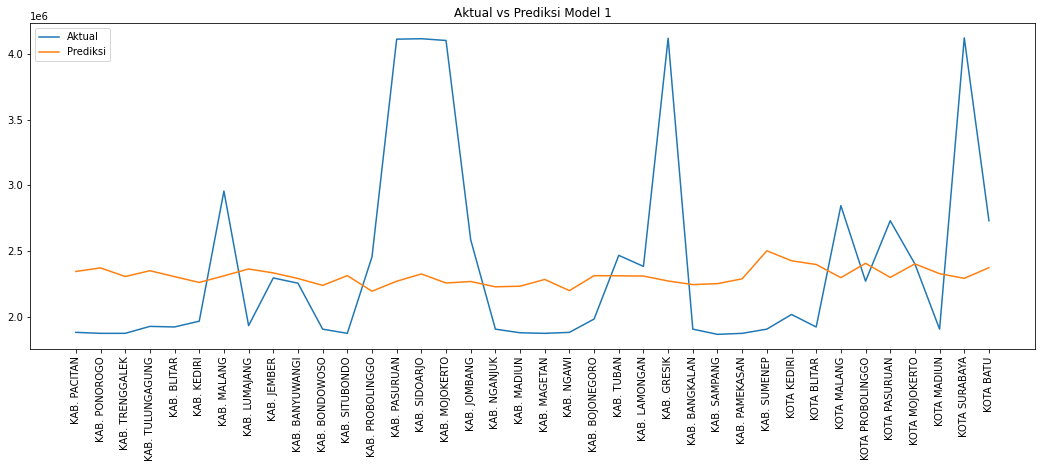

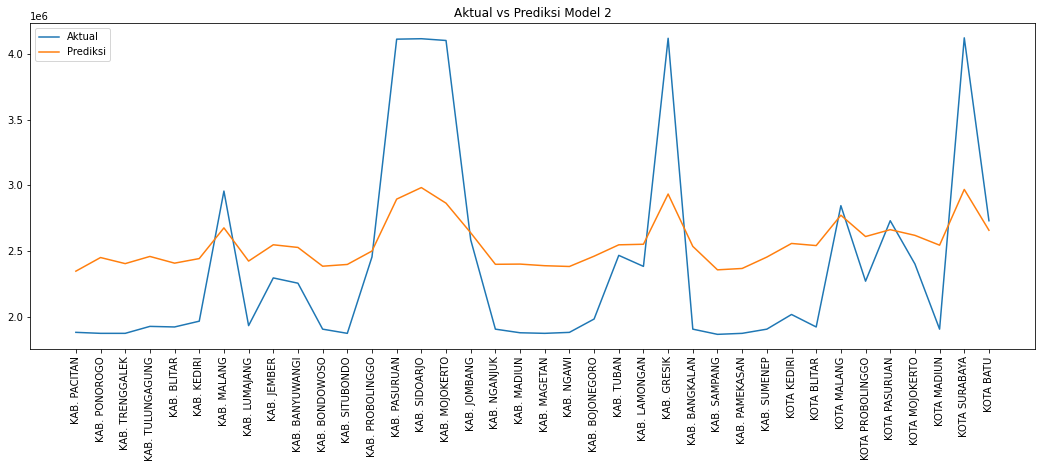

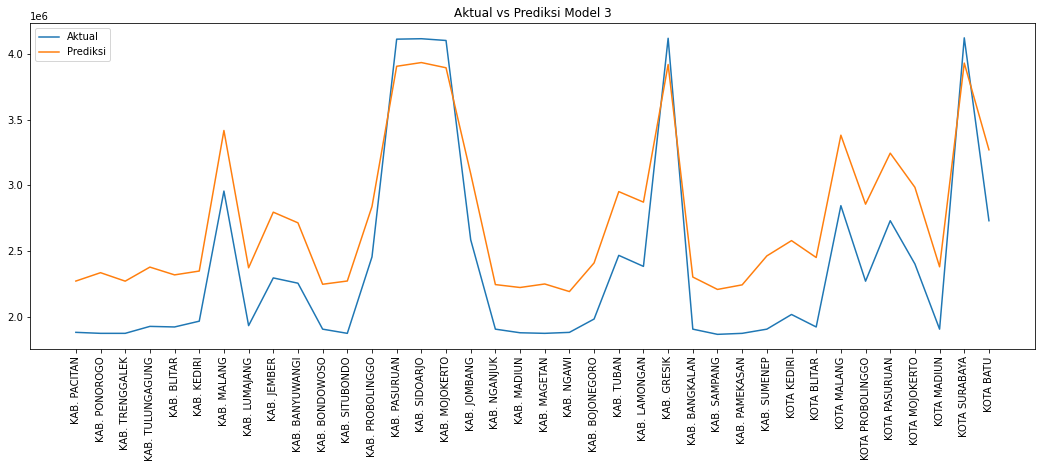

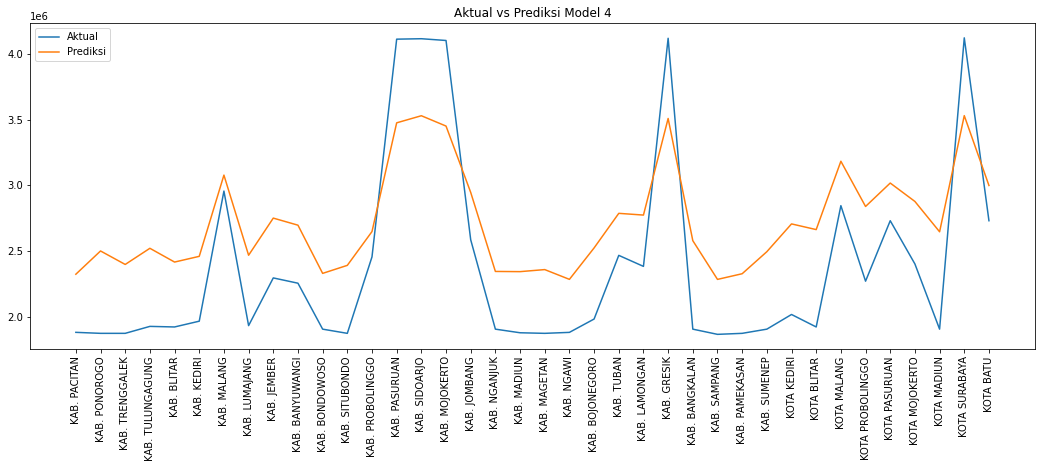

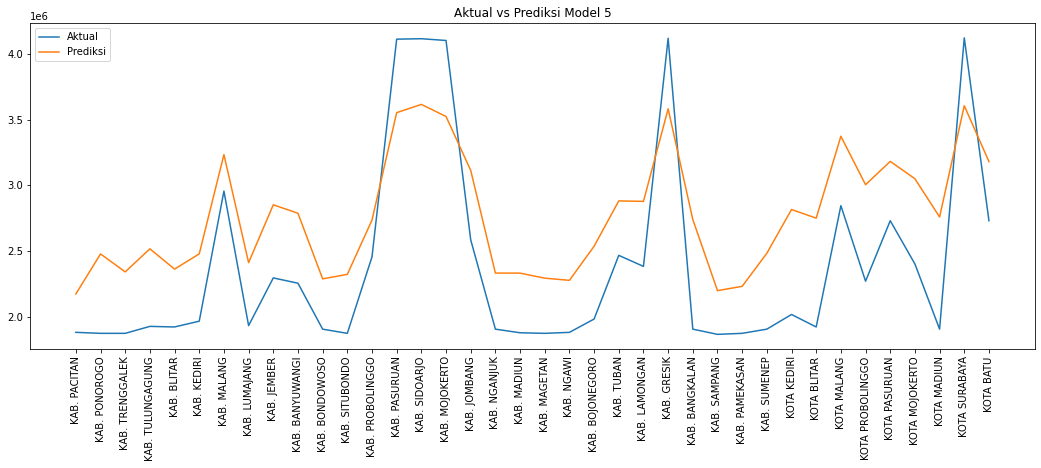

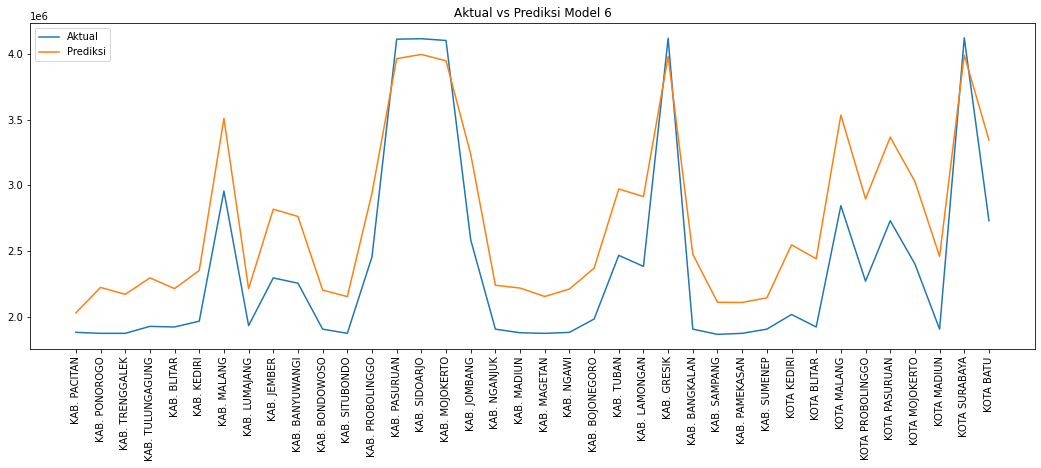

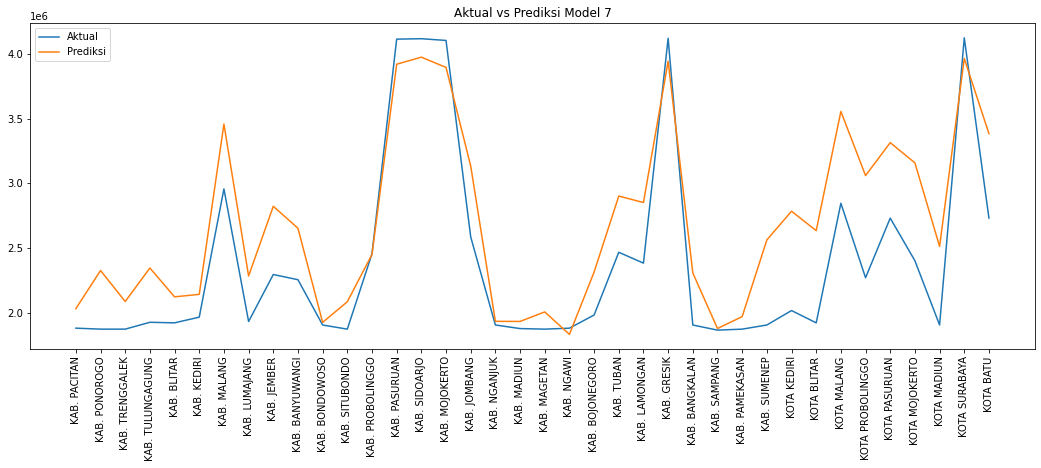

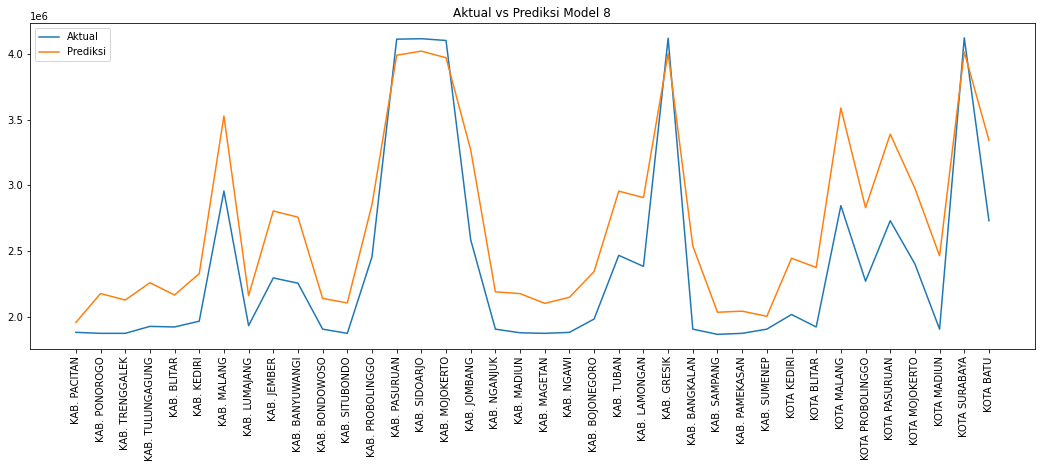

In [430]:
err_list = [errors_1[2][-1], errors_2[2][-1], errors_3[2][-1], errors_4[2][-1], errors_5[2][-1], errors_6[2][-1], errors_7[2][-1], errors_8[2][-1]]
max_acc = err_list[0]
best_index = 0
for i in range(1,len(err_list)):
    if err_list[i] > max_acc:
        max_acc = err_list[i]
        best_index = i
        
# if(best_index == 0):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 1")
plt.plot(kota_kab_test, actual_1_1, label="Aktual")
plt.plot(predicted_1_1, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 1):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 2")
plt.plot(kota_kab_test, actual_1_2, label="Aktual")
plt.plot(predicted_1_2, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 2):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 3")
plt.plot(kota_kab_test, actual_1_3, label="Aktual")
plt.plot(predicted_1_3, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 3):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 4")
plt.plot(kota_kab_test, actual_1_4, label="Aktual")
plt.plot(predicted_1_4, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 4):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 5")
plt.plot(kota_kab_test, actual_1_5, label="Aktual")
plt.plot(predicted_1_5, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 5):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 6")
plt.plot(kota_kab_test, actual_1_6, label="Aktual")
plt.plot(predicted_1_6, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 6):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 7")
plt.plot(kota_kab_test, actual_1_7, label="Aktual")
plt.plot(predicted_1_7, label="Prediksi")
plt.legend()
plt.show()
print()
# elif(best_index == 7):
plt.figure(figsize=(18,6))
plt.xticks(rotation=90)
plt.title("Aktual vs Prediksi Model 8")
plt.plot(kota_kab_test, actual_1_8, label="Aktual")
plt.plot(predicted_1_8, label="Prediksi")
plt.legend()
plt.show()
print()

In [431]:
print(actual_1_7)

[[1879248.05], [1871637.037], [1871637.037], [1924688.033], [1920272.527], [1964332.017], [2956038.32], [1930473.973], [2294081.207], [2253779.03], [1903605.863], [1871637.037], [2454492.277], [4113928.127], [4117286.633], [4103852.573], [2584712.547], [1903605.863], [1876059.18], [1871637.037], [1879033.127], [1980725.79], [2466037.13], [2382030.463], [4120645.14], [1903605.863], [1863970.37], [1871637.037], [1903605.863], [2015381.433], [1920272.53], [2844808.547], [2269220.41], [2730073.263], [2400423.67], [1903605.863], [4124003.663], [2730073.263]]


In [432]:
for i in range(1,len(err_list)):
    if err_list[i] > max_acc:
        max_acc = err_list[i]
        best_index = i

kota_kab_result = []
for i in range(len(df["Kota/KAB"])):
    if(i >= 152):
        str_kota_kab = "" + df["Kota/KAB"][i]
        kota_kab_result.append([str_kota_kab])
        
if(best_index == 0):
    error_train = np.array([
        ["Model 1", mse(actual_2_1, predicted_2_1), mape(actual_1_1, predicted_1_1), 100 - (mape(actual_1_1, predicted_1_1))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_1[i][0])
        pre_pred_table.append(predicted_1_1[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 1):
    error_train = np.array([
        ["Model 2", mse(actual_2_2, predicted_2_2), mape(actual_1_2, predicted_1_2), 100 - (mape(actual_1_2, predicted_1_2))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_2[i][0])
        pre_pred_table.append(predicted_1_2[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 2):
    error_train = np.array([
        ["Model 3", mse(actual_2_3, predicted_2_3), mape(actual_1_3, predicted_1_3), 100 - (mape(actual_1_3, predicted_1_3))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_3[i][0])
        pre_pred_table.append(predicted_1_3[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 3):
    error_train = np.array([
        ["Model 4", mse(actual_2_4, predicted_2_4), mape(actual_1_4, predicted_1_4), 100 - (mape(actual_1_4, predicted_1_4))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_4[i][0])
        pre_pred_table.append(predicted_1_4[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 4):
    error_train = np.array([
        ["Model 5", mse(actual_2_5, predicted_2_5), mape(actual_1_5, predicted_1_5), 100 - (mape(actual_1_5, predicted_1_5))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_5[i][0])
        pre_pred_table.append(predicted_1_5[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 5):
    error_train = np.array([
        ["Model 6", mse(actual_2_6, predicted_2_6), mape(actual_1_6, predicted_1_6), 100 - (mape(actual_1_6, predicted_1_6))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_6[i][0])
        pre_pred_table.append(predicted_1_6[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 6):
    error_train = np.array([
        ["Model 7", mse(actual_2_7, predicted_2_7), mape(actual_1_7, predicted_1_7), 100 - (mape(actual_1_7, predicted_1_7))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_7[i][0])
        pre_pred_table.append(predicted_1_7[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)
elif(best_index == 7):
    error_train = np.array([
        ["Model 8", mse(actual_2_8, predicted_2_8), mape(actual_1_8, predicted_1_8), 100 - (mape(actual_1_8, predicted_1_8))],
    ])
    error_tables = pd.DataFrame(error_train, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
    display(error_tables)
    print()
    pred_table = []
    for i in range(len(kota_kab_result)):
        pre_pred_table = []
        pre_pred_table.append(kota_kab_result[i][0])
        pre_pred_table.append(actual_1_8[i][0])
        pre_pred_table.append(predicted_1_8[i][0])
        pred_table.append(pre_pred_table)
    pred_table = np.array(pred_table)
    prediction_table = pd.DataFrame(pred_table, columns = ['Kota/Kabupaten', 'Aktual', 'Prediksi'])
    display(prediction_table)

,Model,MSE,MAPE,Akurasi
0,Model 8,0.021222268845156024,16.024215752341224,83.97578424765878


,Kota/Kabupaten,Aktual,Prediksi
0,KAB. PACITAN,1879248.05,1954119.7340512183
1,KAB. PONOROGO,1871637.037,2175303.195940328
2,KAB. TRENGGALEK,1871637.037,2125226.772088449
3,KAB. TULUNGAGUNG,1924688.033,2257162.1409864444
4,KAB. BLITAR,1920272.527,2164033.991154108
5,KAB. KEDIRI,1964332.017,2326809.5514607644
6,KAB. MALANG,2956038.32,3528230.8034625268
7,KAB. LUMAJANG,1930473.973,2158496.0576766515
8,KAB. JEMBER,2294081.207,2804440.5377908647
9,KAB. BANYUWANGI,2253779.03,2756983.4884913443


In [434]:
error_test_1 = np.array([
        ["Model 1", mse(actual_2_1, predicted_2_1), mape(actual_1_1, predicted_1_1), 100 - (mape(actual_1_1, predicted_1_1))],
        ["Model 2", mse(actual_2_2, predicted_2_2), mape(actual_1_2, predicted_1_2), 100 - (mape(actual_1_2, predicted_1_2))],
        ["Model 3", mse(actual_2_3, predicted_2_3), mape(actual_1_3, predicted_1_3), 100 - (mape(actual_1_3, predicted_1_3))],
        ["Model 4", mse(actual_2_4, predicted_2_4), mape(actual_1_4, predicted_1_4), 100 - (mape(actual_1_4, predicted_1_4))],
        ["Model 5", mse(actual_2_5, predicted_2_5), mape(actual_1_5, predicted_1_5), 100 - (mape(actual_1_5, predicted_1_5))],
        ["Model 6", mse(actual_2_6, predicted_2_6), mape(actual_1_6, predicted_1_6), 100 - (mape(actual_1_6, predicted_1_6))],
        ["Model 7", mse(actual_2_7, predicted_2_7), mape(actual_1_7, predicted_1_7), 100 - (mape(actual_1_7, predicted_1_7))],
        ["Model 8", mse(actual_2_8, predicted_2_8), mape(actual_1_8, predicted_1_8), 100 - (mape(actual_1_8, predicted_1_8))],
])
error_tables_1 = pd.DataFrame(error_test_1, columns = ['Model', 'MSE', 'MAPE', 'Akurasi'])
display(error_tables_1)

,Model,MSE,MAPE,Akurasi
0,Model 1,0.07300925777114302,20.535367455001055,79.46463254499895
1,Model 2,0.04514844755438578,21.1294362481368,78.8705637518632
2,Model 3,0.02360542174070042,18.968003919289742,81.03199608071026
3,Model 4,0.033378273969447064,22.09509906427419,77.9049009357258
4,Model 5,0.03708911384286993,23.226802602155416,76.77319739784458
5,Model 6,0.023529032449500508,17.718503746669597,82.2814962533304
6,Model 7,0.02338071351856631,15.510895386779158,84.48910461322085
7,Model 8,0.021222268845156024,16.024215752341224,83.97578424765878
